In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.externals import joblib
import json

In [17]:
########## This is the valid code ##############################################################################
#hardcode input values here
month = 2
day = 15
week_day = 3
departure_hour = 14
origin = "ABR"
dest = "XNA"

In [18]:
#create dictionary for airline delay
dict_ad = {}

In [19]:
#Create Dataframe to store 
result = pd.DataFrame(columns=['AIRLINES', 'Prediction'])

In [20]:
result

,AIRLINES,Prediction


In [21]:

# get the ist of airlines
airlines = pd.read_csv('airline_clean_data_0722.csv')
list_airlines = airlines.AIRLINE.unique()
for airline in list_airlines:
    #print (airline)
    print("================" + airline + " Prediction=================================")
    df_name = "data/" + airline + "_testdata.csv"
    #print ("reading test data from file " + df_name)
    #my_df = pd.read_csv("data/DL_testdata.csv")
    my_df = pd.read_csv(df_name)
    #print(my_df.head())
    my_df=my_df.drop('ARRIVAL_DELAY_B',axis=1)
    user_df = pd.DataFrame().reindex_like(my_df)
    #remove all the data except the header/columns
    user_df.drop(my_df.index, inplace=True)
    #print(user_df)
    ZEROS = np.zeros((1,648), dtype=np.int)
    user_df = pd.DataFrame(ZEROS, columns = user_df.columns)
    #print(user_df)
    user_df['MONTH'] = month
    user_df['DAY'] = day
    user_df['DAY_OF_WEEK'] = week_day
    user_df['DEP_HOUR'] = departure_hour
    user_df['ORIGIN_AIRPORT_' + str(origin)] = 1
    user_df['DESTINATION_AIRPORT_' + str(dest)] = 1
    #print("user_df = " + str(user_df))
    print("user_df shape = " + str(user_df.shape))
    model_name = "model/" + airline + "_logmodel.pkl"
    print ("running model " + model_name)
    logmodel = joblib.load(model_name)
    prob = logmodel.predict_proba(user_df)[0][0]
    print (prob)
    dict_ad[airline] = prob
    result= result.append({'AIRLINES': airline , 'Prediction': prob }, ignore_index=True)

with open('data/result.json', 'w') as fp:
    json.dump(dict_ad, fp)
    
####### Valid code ends here ############################################################################

================US Prediction=================================
user_df shape = (1, 648)
running model model/US_logmodel.pkl
0.2
================DL Prediction=================================
user_df shape = (1, 648)
running model model/DL_logmodel.pkl
0.2
================NK Prediction=================================
user_df shape = (1, 648)
running model model/NK_logmodel.pkl
0.1
================AA Prediction=================================
user_df shape = (1, 648)
running model model/AA_logmodel.pkl
0.2
================AS Prediction=================================
user_df shape = (1, 648)
running model model/AS_logmodel.pkl
0.2
================HA Prediction=================================
user_df shape = (1, 648)
running model model/HA_logmodel.pkl
0.2
================B6 Prediction=================================
user_df shape = (1, 648)
running model model/B6_logmodel.pkl
0.1
================UA Prediction=================================
user_df shape = (1, 648)
running model mo

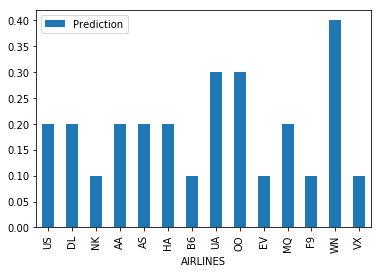

In [22]:
result.plot(kind='bar',x='AIRLINES')

In [23]:
result

,AIRLINES,Prediction
0,US,0.2
1,DL,0.2
2,NK,0.1
3,AA,0.2
4,AS,0.2
5,HA,0.2
6,B6,0.1
7,UA,0.3
8,OO,0.3
9,EV,0.1
